# ▪ 교차검증 및 의사결정나무 예제

- 실습 때 교차검증 및 의사결정나무는 다루지 않았어서 예시 코드를 올려드립니다
- 코딩에 익숙하지 않으신 분들은 과제시 참고하시면 되겠습니다 [(scikit-learn 공식문서)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

### - Imports

In [41]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### - Dataset

In [47]:
data = pd.read_csv('Boston_house.csv')

In [48]:
data = data.dropna()

In [50]:
X = data.drop('Target', axis=1)
y = data['Target']

In [51]:
data

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


### - 10-Fold Splits

In [52]:
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=False)

In [53]:
kf

KFold(n_splits=10, random_state=None, shuffle=False)

### - Cross Validation

- `cross_validate()`의 사용법은 아래와 같음
- 교차검증기법 참고: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
- 평가지표 참고: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)을 사용한 교차검증 기법도 존재

```python
cross_validate(
    estimator=<예측모델>,
    X=<입력변수>,
    y=<출력변수>,
    cv=<교차검증기법>,  # KFold, StratifiedKFold, TimeSeriesSplit 등
    scoring=<평가지표>,  # r2, neg_mean_absolute_error, neg_mean_squared_error 등
    )
```

In [54]:
model = LinearRegression()
metrics = ('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error')
cv_res = cross_validate(model, X, y, cv=kf, scoring=metrics)
cv_res

{'fit_time': array([0.00299191, 0.0029912 , 0.00199437, 0.0039897 , 0.00199747,
        0.0009973 , 0.00299358, 0.00199389, 0.00199413, 0.00199294]),
 'score_time': array([0.00199533, 0.00199437, 0.00299168, 0.00598335, 0.00199151,
        0.00199461, 0.00199437, 0.00199485, 0.00199676, 0.00199461]),
 'test_r2': array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
         0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ]),
 'test_neg_mean_squared_error': array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
         -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
         -33.32974507,  -10.96041068]),
 'test_neg_mean_absolute_error': array([-2.20686845, -2.89680909, -2.78673044, -4.59847835, -4.10986504,
        -3.56469238, -2.66966723, -9.65637767, -5.02272517, -2.53725254])}

In [55]:
cv_r2 = cv_res['test_r2']
# MSE, MAE가 음수로 되어있기 때문에 양수로 바꿔줌
cv_mse = -cv_res['test_neg_mean_squared_error']
cv_mae = -cv_res['test_neg_mean_absolute_error']

Average R2: 0.2025
Average MSE: 34.7053
Average MAE: 4.0049


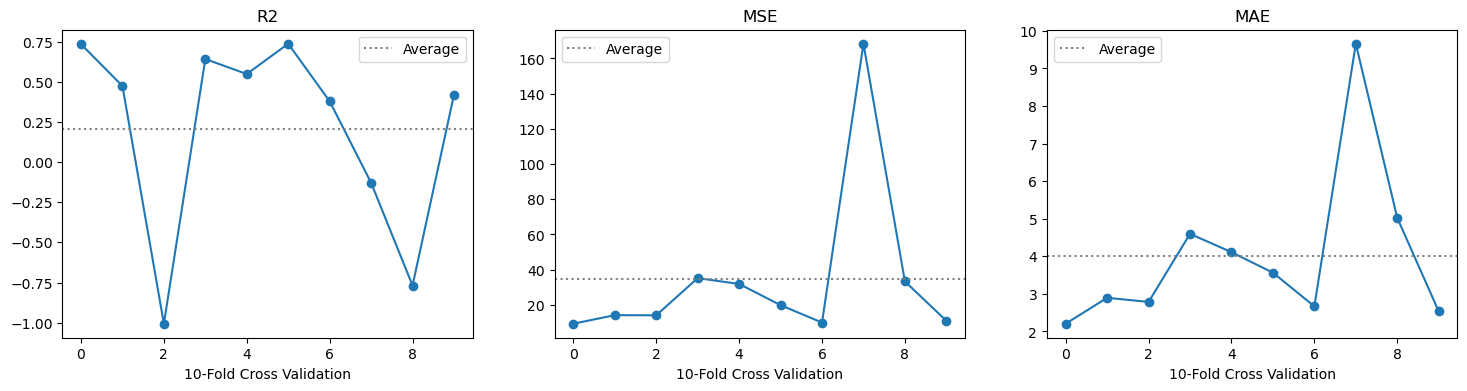

In [56]:
score_list = [cv_r2, cv_mse, cv_mae]
metrics = ['R2', 'MSE', 'MAE']
marker = 'o'
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

for i, ax in enumerate(axs):
    score = score_list[i]
    avg_score = score.mean()
    metric = metrics[i]
    print(f'Average {metric}: {avg_score:.4f}')
    ax.plot(score, marker=marker)
    ax.axhline(avg_score, c='grey', ls=':', label='Average')
    ax.set(title=metric, xlabel='10-Fold Cross Validation')
    ax.legend();

# ▪ 하이퍼파라미터 튜닝 예제

- 교차검증과 하이퍼파라미터 튜닝

## - Imports

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns

## - Dataset

In [57]:
data = pd.read_csv('Boston_house.csv')

In [58]:
data = data.dropna()

In [60]:
X = data.drop('Target', axis=1)
y = data['Target']

## - Hyperparameter Tuning

- Ridge Regression 모델을 예시로 진행
    - 하이퍼파라미터: alpha ($\lambda$)
- MSE를 기준으로 하이퍼파라미터 튜닝 진행
- 10-Fold 교차검증

In [61]:
result_container = {}

for alpha in [0.001, 0.01, 0.1, 1., 10]:
    model = Ridge(alpha=alpha)
    metric = 'neg_mean_squared_error' # MSE가 음수인 점을 주의
    cv_res = cross_validate(model, X, y, cv=10, scoring=metric)  # cv=10은 KFold(n_splits=10)과 동일
    cv_mse = -cv_res['test_score']
    avg_mse = np.mean(cv_mse)
    result_container[alpha] = avg_mse

In [62]:
hyperparam_tuning_res = pd.Series(result_container)
hyperparam_tuning_res

0.001     34.703681
0.010     34.689702
0.100     34.567059
1.000     34.078246
10.000    33.005818
dtype: float64

In [63]:
best_scoring_idx = np.argmin(hyperparam_tuning_res)
best_alpha = hyperparam_tuning_res.index[best_scoring_idx]

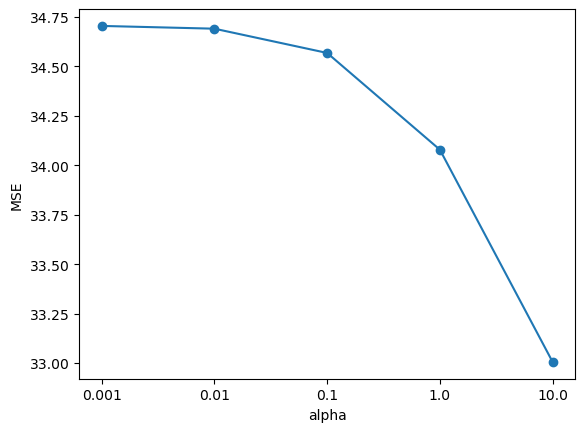

In [64]:
plt.plot(hyperparam_tuning_res.values, marker='o')
plt.xticks(ticks=np.arange(0, 5), labels=hyperparam_tuning_res.index)
plt.xlabel('alpha')
plt.ylabel('MSE');

- Test 데이터셋 예측 코드 예시

```python
>>> # best_alpha = <하이퍼파라미터 결과>
>>> final_model = Ridge(alpha=best_alpha)
>>> pred = final_model.predict(X_test)
>>> mse = mean_squared_error(y_test, pred)
```

## -[[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)] 

- **분류에 활용하고 싶으면 DecisionTreeClassifier를 사용**
      
**주요 하이퍼파라미터**  
- **criterion** : 클래스 동질성을 측정하는 지표 설정, CART에서는 지니불순도(Gini Impurity)를 사용함. [{"gini", "entorpy", "log_loss"}, default = "gini"]
- **max_depth** : 트리의 최대깊이를 설정. 값이 클수록 모델의 복잡도가 올라간다. [int, default = None]
- **min_samples_split** : 자식노드를 분할하는데 필요한 최소 샘플의 수 [int or float, default = 2]
- **min_samples_leaf** : leaf node에서 필요한 최소 샘풀수이며, 너무 적을 시 과적합 발생
- **max_leaf_nodes** : 최대 leaf node 수 제한 [int, default=None]
- **max_features** : 각 노드를 분리할 때 사용 할 최대 속성 수 [int, float or {“auto”, “sqrt”, “log2”}, default=None]

In [67]:
data = pd.read_csv('Boston_house.csv')

In [69]:
data

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [70]:
raw_X = data.iloc[:,:-1]

In [71]:
raw_X

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0


In [72]:
raw_y = data2['Target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data2,raw_y, shuffle=True)

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split


# 원하는 파라미터 설정 
params={
    "max_depth": [None, 1, 5, 10, 50],
    "min_samples_leaf" : [0.1, 0.3, 0.5, 0.7, 0.9],
    "min_samples_split" : [0.2, 0.4, 0.6, 0.8, 1.0],
    "max_leaf_nodes":  [None, 2, 5, 10, 50]
}
params_list = list(ParameterGrid(params)) 

In [77]:
# Grid search 진행
score_list = []
for params2 in params_list:
    model_use = DecisionTreeRegressor(random_state = 42,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )      
    model_use.fit(X_train, y_train)
    valid_pred = model_use.predict(X_test)
    tem = mean_squared_error(valid_pred,y_test) # 성능지표 = MSE 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmin(score_list) # 가장 낮은 MSE 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.6442554814769362
BEST PARAMS {'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_leaf': 6, 'min_samples_split': 2}
